In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
plt.style.use("ggplot")

## Start. Feature analysis

In [130]:
test_values.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0


In [84]:
cwd = Path().cwd()
train_values = pd.read_csv(cwd / 'train_values (1).csv', index_col = False)
train_labels = pd.read_csv(cwd / 'train_labels (2).csv', index_col = False)
test_values = pd.read_csv(cwd / 'test_values (1).csv', index_col = False)
df = train_values.join(train_labels.set_index('building_id'), on= ['building_id'])
target = df.damage_grade
# df.drop('damage_grade', axis = 1, inplace = True)

In [85]:
cat_features = [feature for feature, type_ in zip(df.dtypes.index, df.dtypes) if type_ == 'object']
numeric_features = [feature for feature, type_ in zip(df.dtypes.index, df.dtypes) if type_ == 'int64' and feature != 'damage_grade']
binary_features = [feature for feature in numeric_features if 'has_' in feature]

In [49]:
df[df.age > 900]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
386,435557,14,1120,3789,3,995,12,5,t,r,...,0,0,0,0,0,0,0,0,0,2
716,597626,26,39,1851,2,995,27,6,t,i,...,0,0,0,0,0,0,0,0,0,1
1235,7560,26,1132,9472,2,995,8,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1398,797271,26,39,1851,2,995,14,6,t,u,...,0,0,0,0,0,0,0,0,0,1
1635,857371,24,628,10750,2,995,10,5,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259758,160373,27,390,11020,3,995,6,8,n,r,...,0,0,0,0,0,0,0,0,0,2
259893,9269,24,628,11511,2,995,8,5,n,r,...,0,0,0,0,0,0,0,0,0,2
260093,34321,17,1393,5939,2,995,8,4,t,r,...,0,0,0,0,0,0,0,0,0,3
260542,156434,8,696,7863,2,995,8,8,t,r,...,0,0,0,0,0,0,0,0,0,3


In [50]:
df[['age', 'damage_grade']].groupby('age').value_counts()

age  damage_grade
0    2               12721
     1                7213
     3                6107
5    2               19030
     3                9077
                     ...  
200  3                  39
     1                   3
995  2                 822
     3                 389
     1                 179
Name: count, Length: 107, dtype: int64

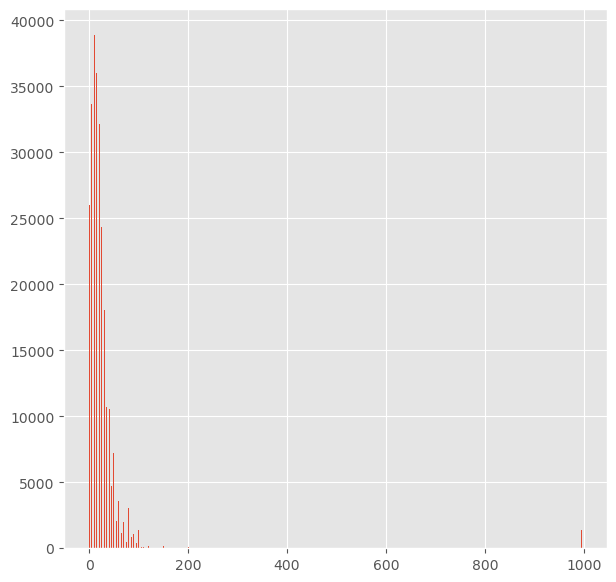

In [51]:
def get_age_plot(df, split):
    fig, ax = plt.subplots(figsize = (7,7))
    plot_values = df.age[(df.age <= split[1]) & (df.age >= split[0])].value_counts()
    ax.bar(plot_values.index, plot_values, width = 2)
    plt.show()
get_age_plot(df, [0, 1000])

## Preprocessing

Что доделать:

- Поменять accuracy на micro_f1_score
- Дописать методы для работы с данными финального предсказания (посмотреть, работают ли вообще)
- Реализовать automated feature engeneering
 

In [52]:
numeric_features

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from copy import copy

In [6]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam, Adagrad

In [7]:
import keras as K
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

### Automated feature engineering

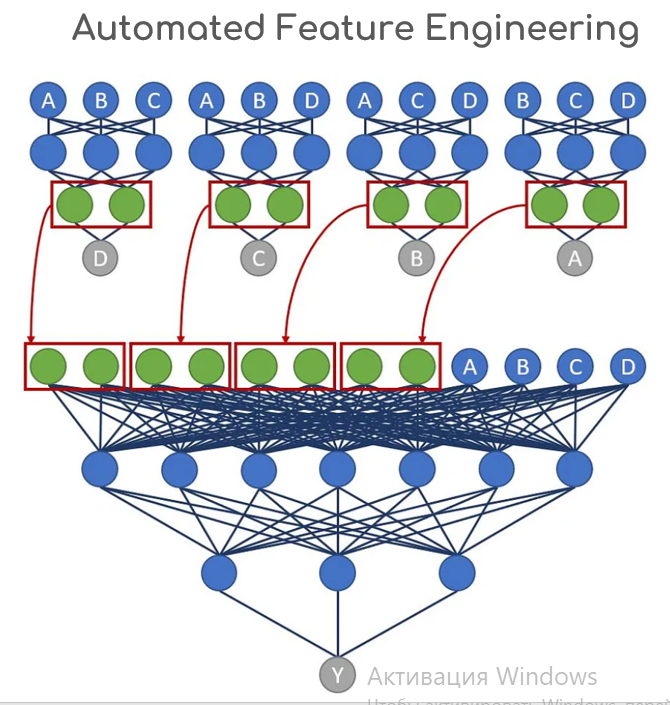

In [8]:
def get_geo_level_encode(geo_1, geo_2, geo_3):
    geo_levels = {'geo1': geo_1, 'geo2': geo_2, 'geo3': geo_3}
    
    inputs = Input(shape = (2,))
    hidden = Dense(64, activation = 'leaky_relu')(inputs)
    hidden = Dense(32, activation = 'leaky_relu')(hidden)
    hidden = Dense(2, activation = 'leaky_relu')(hidden)
    output = Dense(1)(hidden)
    model = Model(inputs = inputs, outputs = output)
    model.compile(optimizer = Adam(), loss = 'mae')
    print('CREATE NEW GEO FEATURES')
    results = {}
    for geo_name, geo_lvl in geo_levels.items():
        outp_name = geo_name + '_to_' + '_and_'.join([key for key in geo_levels.keys() if key != geo_name])
        print(outp_name)
        y = geo_lvl
        X = np.array([geo_levels[key] for key in geo_levels.keys() if key != geo_name]).reshape(-1,2)
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        model.fit(X, y, epochs = 5, batch_size = 512)
        
        # y_pred = model.predict(X)
        # print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)}')
        # print(f'R2: {r2_score(y, y_pred)}')
        # print(f'MSE: {mean_squared_error(y, y_pred)}')
        
        model_pre_final = Model(inputs = model.input, outputs = model.layers[-2].output)
        res = model_pre_final.predict(X)
        results[outp_name] = res
    return results

In [11]:
# geo_levels_encoded = get_geo_level_encode(df.geo_level_1_id, df.geo_level_2_id, df.geo_level_3_id)

CREATE NEW GEO FEATURES
geo1_to_geo2_and_geo3
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 10.7825
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 7.0800
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 7.0670
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 7.0612
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 7.0696
8144/8144 ━━━━━━━━━━━━━━━━━━━━ 5s 595us/step
geo2_to_geo1_and_geo3
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 483.4691
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 357.7599
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 357.5712
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 357.5186
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 357.3350
8144/8144 ━━━━━━━━━━━━━━━━━━━━ 5s 618us/step
geo3_to_geo1_and_geo2
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - loss: 4160.1069
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 3168.4326

In [12]:
# geo_levels_encoded.keys()

dict_keys(['geo1_to_geo2_and_geo3', 'geo2_to_geo1_and_geo3', 'geo3_to_geo1_and_geo2'])

### Preprocessing class

In [96]:
class Preprocessing:
    # actions - (cat_features encoding, remove_old_building)
    def __init__(self, df, numeric_features, cat_features, df_predict = None, scaler = None, actions = (True, True)):
        self.data = df.copy()
        self.scaler = scaler
        self.mean_encoding = []
        self.df_predict = df_predict
        self.numeric_features = numeric_features.copy()
        self.cat_features = cat_features.copy()
        self.actions = actions

    ''' Кодируем категориальные признаки объектов, 
        как среднне значения признака в выборке, у которого наблюдается данный признак '''  
    def cat_features_Mean_Encoding(self, X, y = None):
        if type(y) != type(None):
            temp_df = pd.concat([X, y], axis = 1)
            for feature in self.cat_features:
                mean_encoding_temp = temp_df.groupby(feature)['damage_grade'].mean()
                temp_df[feature] = temp_df[feature].map(mean_encoding_temp)
                self.mean_encoding.append(mean_encoding_temp)
            temp_df.drop('damage_grade', axis = 1, inplace = True)
            return temp_df
        else: # Применяем кодирование для тестовых(валидационных) данных
            if len(self.mean_encoding) != 0:
                X_res = X.copy()
                for feature, encoding in zip(self.cat_features, self.mean_encoding):
                    X_res[feature] = X_res[feature].map(encoding)  
                return X_res
            else:
                raise Exception("You don't encoding categorial features on train data")
        return temp_df
                    
    '''Creatre columns with oldest buildings....... 
        now Im just delete this old buildings'''
    def get_old_build_col(self):
        self.data.drop(self.data[self.data.age >= 900].index, axis = 0, inplace = True)

    ''' Automated feature encoding - 
        представляю geo_level_i_id через 2 других geo_level_id'''
    def get_geo_lvl_col(self):
        geo_levels_encoded = get_geo_level_encode(self.data.geo_level_1_id, 
                                                  self.data.geo_level_2_id, 
                                                  self.data.geo_level_3_id)
        self.data = self.data.assign(merge_col = np.arange(0,self.data.shape[0]))
        features_1 = pd.DataFrame(geo_levels_encoded['geo1_to_geo2_and_geo3'],
                         columns = ['new_geo_1_1','new_geo_1_2']).assign(merge_col = np.arange(0,self.data.shape[0]))

        features_2 = pd.DataFrame(geo_levels_encoded['geo2_to_geo1_and_geo3'], 
                         columns = ['new_geo_2_1','new_geo_2_2']).assign(merge_col = np.arange(0,self.data.shape[0]))

        features_3 = pd.DataFrame(geo_levels_encoded['geo3_to_geo1_and_geo2'], 
                         columns = ['new_geo_3_1','new_geo_3_2']).assign(merge_col = np.arange(0,self.data.shape[0]))
        for feature in [features_1, features_2, features_3]:
            self.data = self.data.merge(feature, on = 'merge_col', how = 'left')
        self.data.drop('merge_col', axis = 1, inplace = True)
        self.data.drop(['geo_level_1_id',
                        'geo_level_2_id',
                        'geo_level_3_id'], axis = 1, inplace = True)
        self.numeric_features.remove('geo_level_1_id')
        self.numeric_features.remove('geo_level_2_id')
        self.numeric_features.remove('geo_level_3_id')
        
        
        
    # Try Min_Max_scaler, StandardScaler and ....
    def use_scaler(self, X, train_flag = True):
        X_res = X.copy()
        if train_flag:
            X_res = pd.DataFrame(self.scaler.fit_transform(X_res), 
                                 index = X_res.index, 
                                 columns = X_res.columns)
            return X_res
        else:
            X_res = pd.DataFrame(self.scaler.transform(X_res), 
                                 index = X_res.index, 
                                 columns = X_res.columns)
            return X_res
        
    def get_final_data(self, test_size = 0.33, stratify = None):
        if self.actions[1]:
            self.get_old_build_col() # Убираем здания, которым больше 900 лет
            
        self.data.drop('building_id', axis =1, inplace = True)
        self.numeric_features.remove('building_id') 
        # self.get_geo_lvl_col()
        target = self.data['damage_grade']
        
        if type(self.df_predict) == type(None):
            self.data.drop('damage_grade', axis = 1, inplace = True)
            X_train, X_test, y_train, y_test = train_test_split(self.data, 
                                                                target, 
                                                                test_size = test_size, 
                                                                random_state = 42, 
                                                                stratify = stratify)
            
            if type(self.scaler) != type(None): # Нормализуем численные признаки
                X_train_numeric = self.use_scaler(X_train[self.numeric_features])
                X_test_numeric = self.use_scaler(X_test[self.numeric_features], train_flag = False)
                
            else:
                X_train_numeric = X_train[self.numeric_features]
                X_test_numeric = X_test[self.numeric_features]
            
            if self.actions[0]:
                X_train_cat = self.cat_features_Mean_Encoding(X_train[self.cat_features], y_train)
            
                X_test_cat = self.cat_features_Mean_Encoding(X_test[self.cat_features])
                X_train_final = pd.concat([X_train_numeric, X_train_cat], axis = 1)
                X_test_final = pd.concat([X_test_numeric, X_test_cat], axis = 1)
                return X_train_final, X_test_final, y_train, y_test
            else:
                return X_train, X_test, y_train, y_test
        else:
            # print(self.df_predict.head(2))
            if type(self.scaler) != type(None):
                X_numeric = self.use_scaler(self.df_predict[self.numeric_features])
            else:
                X_numeric = self.df_predict[self.numeric_features]
            if self.actions[0]:
                _ = self.cat_features_Mean_Encoding(self.data[self.cat_features], target)
                X_cat = self.cat_features_Mean_Encoding(self.df_predict[self.cat_features])
                X_final = pd.concat([X_numeric, X_cat], axis = 1)
            else:
                X_final = pd.concat([X_numeric, self.df_predict[self.cat_features]], axis = 1)
                print(type(X_final))
            return X_final
                
            

## Model selection

### Decision Tree, Random Forest, KNN, Log Regr, SVM

Class for model selection

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, make_scorer, f1_score



class ModelSelection:
    def __init__(self, models, params_grid):
        self.models = models
        self.param_grids = params_grid
        self.best_model = None
        self.best_params = None
        self.best_score = 0
        
    def find_best_models(self, X, y, cv = 5, train_results_flag = False):
        best_models_params = dict()
        best_models_score = dict()
        # models_cv_results = dict()
        scorer = make_scorer(f1_score, average='micro')
        
        for model_name, model in tqdm(models.items()):
            print(f'Traning {model_name}...')
            param_grid = param_grids[model_name]
            grid_search = GridSearchCV(model, param_grid, cv = cv, scoring = scorer, n_jobs = -1) # Mb change metric
            grid_search.fit(X, y)
            
            best_models_params[model_name] = grid_search.best_params_
            best_models_score[model_name] = grid_search.best_score_
            # models_cv_results[model_name] = grid_search.cv_results_
            
            if grid_search.best_score_ > self.best_score:
                self.best_model = grid_search.best_estimator_
                self.best_params = grid_search.best_params_
                self.best_score = grid_search.best_score_
                
        if train_results_flag:
            return best_models_params, best_models_score

    def fit_best_model(self, X_train, y_train):
        if self.best_model:
            self.best_model = self.best_model.fit(X_train, y_train)
            # joblib.dumb(self.best_model, 'best_model.pkl')
        else:
            raise Exception("No best model found. Please run find_best_model first.")

    def predict(self, X_test):
        if self.best_model:
            return self.best_model.predict(X_test)        
        else:
            raise Exception("No best model found. Please run find_best_model first.")

    def evaluete(self, X_test, y_test):
        predictions = self.predict(X_test)                   
        return accuracy_score(y_test, predictions)    

model's param grids

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

cat_features = [feature for feature, type_ in zip(df.dtypes.index, df.dtypes) if type_ == 'object']
numeric_features = [feature for feature, type_ in zip(df.dtypes.index, df.dtypes) if type_ == 'int64' and feature != 'damage_grade']
binary_features = [feature for feature in numeric_features if 'has_' in feature]

models = {
    'tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(),
    'random_forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    # 'logreg': LogisticRegression(),
}
# param_grids = {
#     'tree': {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': np.arange(10, 100, 30)},
#     'random_forest': {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [40, 45], 'max_features': ['sqrt', 'log2']},
#     # 'SVM': {'kernel': ['linear', 'poly']},
#     'Logreg':{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.1, 1, 10]}
# }

param_grids = {
    'tree': {'max_depth': np.arange(10, 21, 10)},
    'knn': {'n_neighbors': [5,10]},
    'random_forest': {'max_depth': [30, 40]},
    'logreg': {'penalty': ['l1', 'l2']},
                      
}

table for compare results

In [163]:
def result_table(models_params, models_score, data_changes, add = False, old_table = None):
    table_str = []
    for model_name in models_score.keys():
        table_str.append([model_name, models_params[model_name], data_changes, models_score[model_name]])
    table = pd.DataFrame(table_str, columns = ['Model_name', 'Model_params','Data changes','Micro_f1_score'])
    if not add:
        return table
    else:
        return pd.concat([old_table, table])

In [175]:
preprocessing = Preprocessing(df, numeric_features, cat_features, scaler = StandardScaler()) # '+new_geo_col', '-old buildings'
X_train, X_test, y_train, y_test = preprocessing.get_final_data()

selector = ModelSelection(models, param_grids)
best_models_params, best_models_score = selector.find_best_models(X_train, y_train, train_results_flag = True)
res_table = result_table(best_models_params, best_models_score, ['-old buildings'])

  0%|          | 0/3 [00:00<?, ?it/s]

Traning tree...


 33%|███▎      | 1/3 [00:07<00:15,  7.81s/it]

Traning knn...


 67%|██████▋   | 2/3 [01:13<00:42, 42.08s/it]

Traning random_forest...


100%|██████████| 3/3 [03:04<00:00, 61.39s/it]


In [167]:
res_table

,Model_name,Model_params,Data changes,Micro_f1_score
0,tree,{'max_depth': 10},"[+new_geo_col, -old buildings]",0.593219
1,knn,{'n_neighbors': 10},"[+new_geo_col, -old buildings]",0.581312
2,random_forest,{'max_depth': 30},"[+new_geo_col, -old buildings]",0.607672


## CatBoost

In [51]:
preprocessing = Preprocessing(df, numeric_features, cat_features, scaler = None, actions = (False, False)) # '+new_geo_col', '-old buildings'
X_train, X_test, y_train, y_test = preprocessing.get_final_data()

CREATE NEW GEO FEATURES
geo1_to_geo2_and_geo3
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.4044
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0821
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0844
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0686
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.0527
8144/8144 ━━━━━━━━━━━━━━━━━━━━ 5s 667us/step
geo2_to_geo1_and_geo3
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 450.0681
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 356.7939
Epoch 3/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 356.3628
Epoch 4/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 357.2928
Epoch 5/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 356.7089
8144/8144 ━━━━━━━━━━━━━━━━━━━━ 5s 645us/step
geo3_to_geo1_and_geo2
Epoch 1/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3889.2200
Epoch 2/5
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3167.0823
Epoch 3/5
50

In [27]:
# !pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.3/101.7 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.5/101.7 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.8/101.7 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.2/101.7 MB 5.0 MB/s eta 0:00:21
    --------------------------------------- 1.6/101.7 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 1.9/101.7 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.1/101.7 MB 6.0 MB/s eta 0:00:17
    --------------------------------------- 2.4/101.7 MB 6.0 MB/s eta 0:00:17
   - -------------------------------------- 3.0/101.7 MB 6.5 MB/s eta 0:00:16
   - -------------------------------------- 3.3/101.7 MB 6.7 MB/s eta 0:00:15


In [28]:
from catboost import CatBoostClassifier, Pool

In [52]:
train_pool = Pool(X_train, y_train, cat_features = cat_features)
test_pool = Pool(X_test, y_test,cat_features = cat_features)

In [47]:
model = CatBoostClassifier(
    iterations=1000,    # количество итераций
    learning_rate=0.1,  # скорость обучения
    depth=7,            # глубина деревьев
    loss_function='MultiClass',  # функция потерь
    verbose=100         # вывод логов каждые 100 итераций
)

In [48]:
model.fit(train_pool, eval_set=test_pool)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

0:	learn: 1.0449194	test: 1.0450046	best: 1.0450046 (0)	total: 479ms	remaining: 7m 58s
100:	learn: 0.6806934	test: 0.6846251	best: 0.6846251 (100)	total: 47.6s	remaining: 7m 4s
200:	learn: 0.6522449	test: 0.6609039	best: 0.6609039 (200)	total: 1m 32s	remaining: 6m 7s
300:	learn: 0.6353591	test: 0.6479679	best: 0.6479679 (300)	total: 2m 18s	remaining: 5m 22s
400:	learn: 0.6238345	test: 0.6404623	best: 0.6404623 (400)	total: 3m 10s	remaining: 4m 45s
500:	learn: 0.6136085	test: 0.6342264	best: 0.6342264 (500)	total: 4m 2s	remaining: 4m 1s
600:	learn: 0.6051891	test: 0.6296583	best: 0.6296583 (600)	total: 4m 53s	remaining: 3m 15s
700:	learn: 0.5981261	test: 0.6259327	best: 0.6259327 (700)	total: 5m 46s	remaining: 2m 27s
800:	learn: 0.5917099	test: 0.6230418	best: 0.6230418 (800)	total: 6m 37s	remaining: 1m 38s
900:	learn: 0.5855965	test: 0.6205371	best: 0.6205371 (900)	total: 7m 28s	remaining: 49.3s
999:	learn: 0.5796210	test: 0.6177363	best: 0.6177363 (999)	total: 8m 18s	remaining: 0us

b

new geo features

In [53]:
model.fit(train_pool, eval_set=test_pool)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

0:	learn: 1.0561661	test: 1.0562582	best: 1.0562582 (0)	total: 450ms	remaining: 7m 29s
100:	learn: 0.7742011	test: 0.7780959	best: 0.7780959 (100)	total: 40.6s	remaining: 6m 1s
200:	learn: 0.7612496	test: 0.7712907	best: 0.7712907 (200)	total: 1m 24s	remaining: 5m 34s
300:	learn: 0.7535895	test: 0.7692386	best: 0.7692376 (299)	total: 2m 9s	remaining: 5m
400:	learn: 0.7468577	test: 0.7681174	best: 0.7681174 (400)	total: 2m 54s	remaining: 4m 21s
500:	learn: 0.7412037	test: 0.7678725	best: 0.7678725 (500)	total: 3m 44s	remaining: 3m 43s
600:	learn: 0.7359300	test: 0.7677371	best: 0.7676766 (583)	total: 4m 36s	remaining: 3m 3s
700:	learn: 0.7310610	test: 0.7677793	best: 0.7676393 (634)	total: 5m 28s	remaining: 2m 20s
800:	learn: 0.7260387	test: 0.7678874	best: 0.7676393 (634)	total: 6m 21s	remaining: 1m 34s
900:	learn: 0.7212666	test: 0.7681616	best: 0.7676393 (634)	total: 7m 13s	remaining: 47.6s
999:	learn: 0.7164247	test: 0.7683920	best: 0.7676393 (634)	total: 8m 4s	remaining: 0us

bestT

In [81]:
preprocessing = Preprocessing(df, numeric_features, cat_features, df_predict = df, scaler = None, actions = (False, True)) # '+new_geo_col', '-old buildings'
X_final = preprocessing.get_final_data()

In [83]:
df.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2


In [158]:
preprocessing = Preprocessing(df, numeric_features, cat_features, df_predict= df, scaler = None, actions = (False, True)) # '+new_geo_col', '-old buildings'
# X_train, X_test, y_train, y_test = preprocessing.get_final_data()
# train_pool = Pool(X_train, y_train, cat_features = cat_features)
# test_pool = Pool(X_test, y_test,cat_features = cat_features)
X_final =  preprocessing.get_final_data()
model = CatBoostClassifier(
    iterations= 1500,    # количество итераций
    learning_rate=0.1,  # скорость обучения
    depth=10,            # глубина деревьев
    loss_function='MultiClass',  # функция потерь
    verbose=100         # вывод логов каждые 100 итераций
)
# model.fit(train_pool, eval_set=test_pool)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='micro')

# print(f'Accuracy: {accuracy}')
# print(f'F1 Score: {f1}')
final_pool = Pool(df.drop(['damage_grade'], axis = 1),df.damage_grade, cat_features = cat_features)
model.fit(final_pool)
final_pred = model.predict(test_values)

<class 'pandas.core.frame.DataFrame'>
0:	learn: 1.0407079	total: 1.19s	remaining: 29m 46s


KeyboardInterrupt: 

In [153]:
final_pred_ = pd.DataFrame(final_pred)

In [154]:
final_pred_['building_id'] = test_values.building_id
final_pred_ = final_pred_.rename({0: 'damage_grade'}, axis = 1)

In [155]:
final_pred_ = final_pred_[['building_id','damage_grade']]

In [156]:
final_pred_.to_csv('final_predictions_3.csv', index = False)